# Import packages

In [14]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
from endolas import utils
import os
import importlib

import pandas as pd
import seaborn as sns

# Load data and plot

In [15]:
data = pd.read_csv('evaluation_nn.csv')

In [16]:
data['Experiment'] =data['Experiment'].replace({1:"1) LASTEN BS2",
                            2:"2) LASTEN BS4",
                            3:"3) LASTENS",
                            4:"4) LASTENA",
                            5:"5) LASTENAS"})

In [17]:
data

,Unnamed: 0,Accuracy,Image,Set,Experiment
0,0,1.000000,12,val,1) LASTEN BS2
1,1,0.993631,15,val,1) LASTEN BS2
2,2,1.000000,22,val,1) LASTEN BS2
3,3,1.000000,38,val,1) LASTEN BS2
4,4,1.000000,40,val,1) LASTEN BS2
...,...,...,...,...,...
1651,1651,1.000000,208,test,4) LASTENA
1652,1652,1.000000,211,test,4) LASTENA
1653,1653,1.000000,218,test,4) LASTENA
1654,1654,1.000000,228,test,4) LASTENA


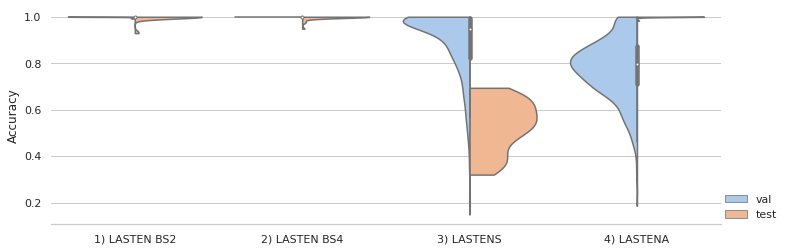

In [6]:
plt.rcParams['figure.figsize'] = 12,4
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
ax=sns.violinplot(x="Experiment", y="Accuracy", hue="Set",
               split=True,
               cut=0,
               #palette={"val": "m", "test": "r"},
               whis=[0, 100],
               data=data,
                 scale="width")

#ax.set(ylim=(0.9, 1.0))
ax.set_xlabel("")
sns.despine(left=True)
plt.legend(loc=(1.0, 0.0), frameon=False)

plt.savefig("violin_nn.svg")

In [18]:
mean_acc_val = []
mean_acc_test = []
indices = ["1) LASTEN BS2","2) LASTEN BS4", "3) LASTENS", "4) LASTENA"]
indices_str = x = np.array(indices)

for i in indices:
    mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
    mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())

<ipython-input-18-13e67a4e922f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
<ipython-input-18-13e67a4e922f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())


In [19]:
def show_values_on_bars(axs, h_v="v", space=-0.4, offset = 0.001):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + offset
                value = round(p.get_height(),2)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + offset
                value = round(p.get_width(),4)
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

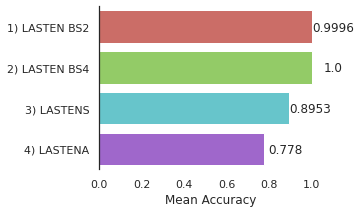

In [23]:
plt.rcParams['figure.figsize'] = 4,3
sns.set(style="white")#, context="talk")
ax = sns.barplot(y=indices_str, x=mean_acc_val, order=indices_str, palette="hls")

ax.set_xlabel("Mean Accuracy")
#ax.set(ylim=(0.9, 1.0))

show_values_on_bars(ax, h_v="h", space=0.1, offset=-0.3)
sns.despine(bottom=True)

plt.savefig("barblot_nn_val.svg")